In [1]:
# Importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly as ply
%matplotlib inline
import seaborn as sns
import calendar as cal

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
import cufflinks as cf

In [4]:
# For Notebooks
init_notebook_mode(connected=True)

In [5]:
# For offline use
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [6]:
df2010 = pd.read_csv("all_house_senate_2010.csv",encoding='ISO-8859-1', low_memory=False)
df2012 = pd.read_csv("all_house_senate_2012.csv",encoding='ISO-8859-1', low_memory=False)
df2014 = pd.read_csv("all_house_senate_2014.csv",encoding='ISO-8859-1', low_memory=False)
df2016 = pd.read_csv("all_house_senate_2016.csv",encoding='ISO-8859-1', low_memory=False)

In [7]:
frames = [df2010, df2012, df2014, df2016]
elecdata = pd.concat(frames)

In [8]:
## Removing missing values 

#remove missing values from can_off_dis
elecdata.dropna(subset=['can_off_dis'], how='all', inplace = True)

#remove missing values from dis_dat
elecdata.dropna(subset=['dis_dat'], how='all', inplace = True)

#remove missing values from dis_amo
elecdata.dropna(subset=['dis_amo'], how='all', inplace = True)

#remove missing values from lin_num
elecdata.dropna(subset=['lin_num'], how='all', inplace = True)

In [9]:
#Dropping the columns due to no Data present
elecdata.drop('rec_com_id',axis=1,inplace=True)
elecdata.drop('rec_str1',axis=1,inplace=True)
elecdata.drop('rec_str2',axis=1,inplace=True)
elecdata.drop('mem_cod',axis=1,inplace=True)
elecdata.drop('mem_tex',axis=1,inplace=True)
elecdata.drop('com_id',axis=1,inplace=True)
elecdata.drop('can_id',axis=1,inplace=True)
elecdata.drop('lin_ima',axis=1,inplace=True)
elecdata.drop('lin_num',axis=1,inplace=True)
elecdata.drop('bac_ref_id',axis=1,inplace=True)

In [10]:
# Filling the missing values
elecdata['rec_nam'].fillna('UNKNOWN', inplace=True)
elecdata['rec_sta'].fillna('UNKNOWN', inplace=True)
elecdata['rec_cit'].fillna('UNKNOWN', inplace=True)
elecdata['rec_zip'].fillna('UNKNOWN', inplace=True)
elecdata['dis_pur_des'].fillna('UNKNOWN', inplace=True)
elecdata['cat_cod'].fillna('UNKNOWN', inplace=True)
elecdata['cat_des'].fillna('UNKNOWN', inplace=True)

In [11]:
# Formatting the amount field
elecdata['dis_amo'] = elecdata['dis_amo'].str.replace(',', '')
elecdata['dis_amo'] = elecdata['dis_amo'].str.replace('$', '')
elecdata['dis_amo'] = elecdata['dis_amo'].astype(float)

In [12]:
# Seperating the Date into Years, Months and Days
elecdata['date'] = elecdata['dis_dat'].astype('datetime64[ns]')
elecdata['date'] = pd.to_datetime(elecdata['date'])
elecdata['year'] = elecdata['date'].dt.year
elecdata['month'] = elecdata['date'].dt.month
elecdata['day'] = elecdata['date'].dt.day
import calendar as cal
elecdata['month'] = elecdata['month'].apply(lambda x: cal.month_abbr[x])

In [13]:
## Delete Observation with year other than 2010,2012,2014,2016
elecdata = elecdata[elecdata['date'].dt.year.isin([2010,2012,2014,2016])]

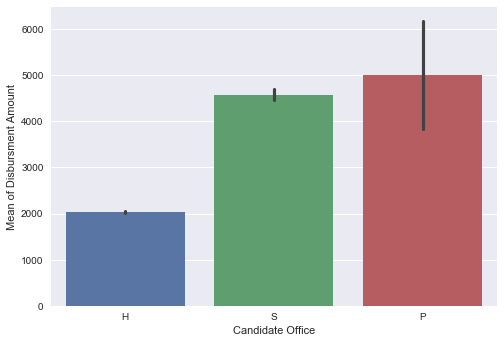

In [19]:
#Barplot
br = sns.barplot(x='can_off',y='dis_amo',data=elecdata)

# Changing the labels for X and Y Axis
br.set(xlabel='Candidate Office', ylabel='Mean of Disbursment Amount')

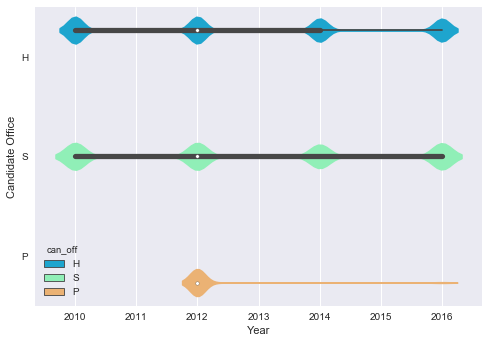

In [25]:
br = sns.violinplot(x=elecdata['ele_yea'], y="can_off", data=elecdata, hue='can_off',palette='rainbow')
br.set(xlabel='Year', ylabel='Candidate Office')

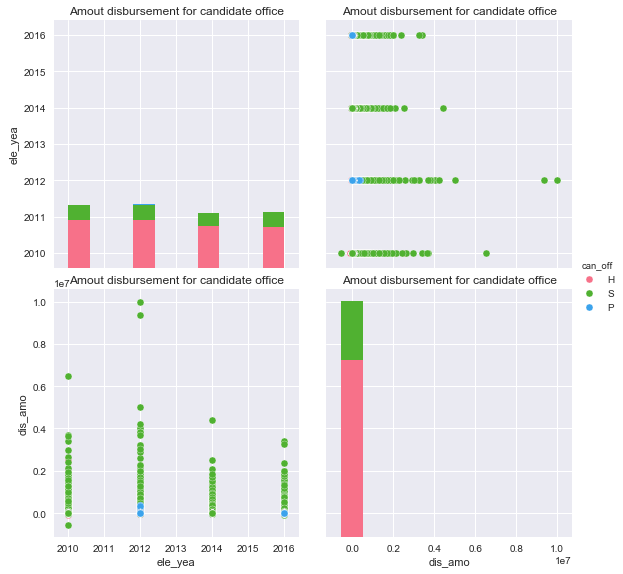

In [28]:
df_com_off = elecdata[['ele_yea','dis_amo','can_off','cat_des']]
#br = sns.pairplot(df_com_off,hue='can_off',palette='husl')
g = sns.pairplot(df_com_off, size=4,
hue='can_off',
palette='husl' )
g.set(title='Amout disbursement for candidate office')

In [26]:
#Heatmap
df_pivot = elecdata[['year','dis_amo','can_off','cat_des','month']]
df_pivot.pivot_table(values='dis_amo',index='month',columns='year')

year,2010,2012,2014,2016
month,,,,
Apr,2219.705591,2206.245400,2238.101363,2154.474220
Aug,2902.759056,2714.055983,2281.101951,2880.468184
Dec,1436.639446,1720.283925,1607.049005,1874.124433
Feb,1344.544957,1382.779464,1682.973819,1800.254546
Jan,1830.164883,1512.405175,1619.907726,1726.309499
Jul,2261.553844,2822.401334,2506.539344,2592.553622
Jun,1628.670162,1868.635717,1805.922600,1893.702866
Mar,1366.413814,1669.761577,1481.565965,1894.583867
May,2032.695651,2169.479602,2059.930939,2161.513207


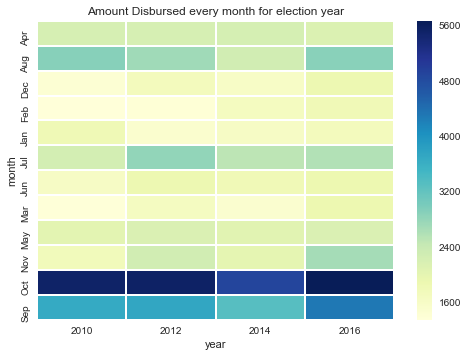

In [27]:
pvelec = df_pivot.pivot_table(values='dis_amo',index='month',columns='year')
ax = sns.heatmap(pvelec,cmap='YlGnBu',linecolor='white',linewidths=1)
ax.set_title('Amount Disbursed every month for election year')

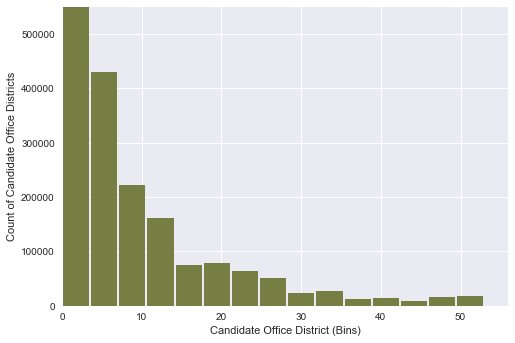

In [15]:
elecdata['can_off_dis'].hist(bins=15, facecolor='#555F33',histtype='bar', rwidth=0.93),
plt.xlabel('Candidate Office District')
plt.ylabel('Count of Districts for Candidate Office')
plt.axis([0,56,0,550000])
sns.despine(left=True)
plt.grid(True)

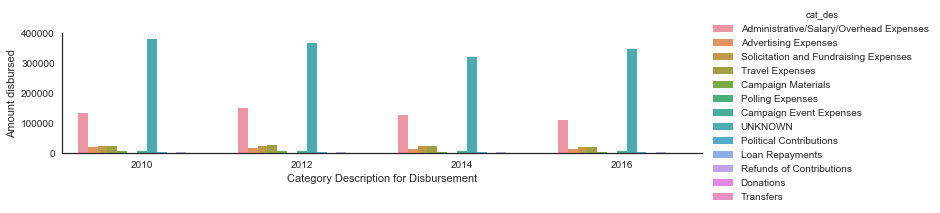

In [36]:
df_data = elecdata[['year','cat_des','dis_amo']]
with sns.axes_style('white'):
    g = sns.factorplot("year", data=df_data, aspect=4.0, kind='count',size=2.5,
                       hue='cat_des')
    g.set_ylabels("Amount disbursed")
    g.set_xlabels("Category Description for Disbursement")

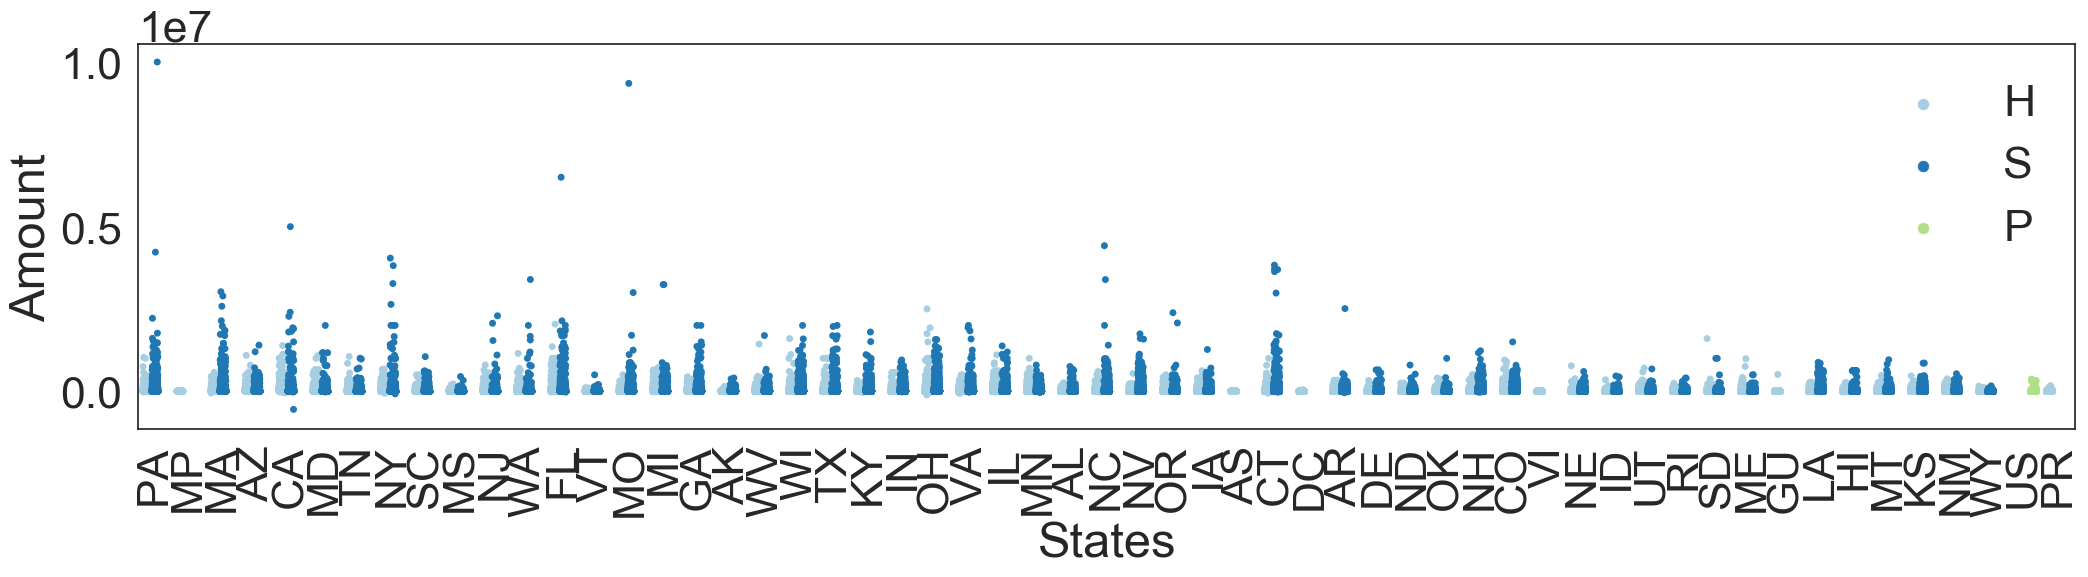

In [132]:
df_str = elecdata[['can_off_sta','dis_amo','can_off']]
sns.fig = plt.figure(figsize=(25,5))
sns.set_style('white')
# Setting the position of Legend
g = sns.stripplot(x=df_str['can_off_sta'], y="dis_amo", hue = 'can_off', data=df_str, jitter=0.25, palette='Paired', split=True)
g.set(xlabel='States', ylabel='Amount')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.legend(loc=1)


In [22]:
import plotly.plotly as py 
py.sign_in('siddhika', 'IYGAKu0isuvv63IVHVY0')
import plotly 
plotly.tools.set_credentials_file(username='siddhika', api_key='IYGAKu0isuvv63IVHVY0')

In [23]:
gmap = elecdata.groupby(['ele_yea','can_off_sta']).agg({'dis_amo' : 'sum'}).reset_index()

In [24]:
gmap.head()

,ele_yea,can_off_sta,dis_amo
0,2010,AK,7709918.29
1,2010,AL,13502558.16
2,2010,AR,32612664.87
3,2010,AS,116032.47
4,2010,AZ,53948911.72


In [25]:
for col in gmap.columns:
    gmap[col] = gmap[col].astype(str)

    #defining colour scale
scl = [[0.0, 'rgb(244,194,194)'],[0.2, 'rgb(255,92,92)'],[0.4, 'rgb(255,8,0)'],\
            [0.6, 'rgb(205,92,92)'],[0.8, 'rgb(164,0,0)'],[1.0, 'rgb(112,28,28)']]

#creating text on hover - Change
gmap['text'] = gmap['dis_amo']+'<br>'+'amount disbursed from '+'<br>'+\
gmap['can_off_sta']+'<br>'+'in year '+ gmap['ele_yea']
    
#plotting data    
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = gmap['can_off_sta'],
        z = gmap['dis_amo'].astype(float),
        locationmode = 'USA-states',
        text = gmap['text'],
        marker = dict(
            line = dict (
                color = 'rgb(0,0,0)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Amount disbursed for candidate office as per year per state")
        ) ]

#defining plot properties
layout = dict(
        title = 'Amount disbursed for candidate office as per year per state',
        geo = dict(
            scope='usa',
            countrycolor='rgb(255, 255, 128)',
            countrywidth=0.1,
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(84,39,143)'),
            )
    
fig = dict(data=data, layout=layout )

#plotting boxplot
py.iplot(fig)

In [138]:
elecdata.corr()

,ele_yea,can_off_dis,dis_amo,year,day
ele_yea,1.000000,0.018291,0.001457,0.999557,-0.000138
can_off_dis,0.018291,1.000000,-0.016474,0.018255,0.012559
dis_amo,0.001457,-0.016474,1.000000,0.001529,0.004745
year,0.999557,0.018255,0.001529,1.000000,-0.000292
day,-0.000138,0.012559,0.004745,-0.000292,1.000000


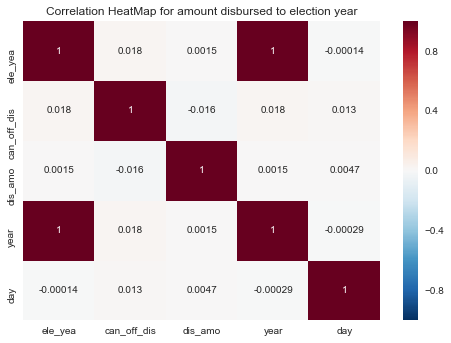

In [20]:
#fig, ax = plt.subplots(figsize=(5,5))
br = sns.heatmap(elecdata.corr(), annot=True, annot_kws={"size": 10})

br.set_title('Correlation HeatMap for amount disbursed to election year')

In [15]:
import matplotlib.pyplot as plt
dffacet = elecdata[['can_off','ele_yea','dis_amo']]

dfyear_out = dffacet[dffacet.dis_amo <= 10000]
dfyear_out = dfyear_out[dfyear_out.dis_amo >= 1000]

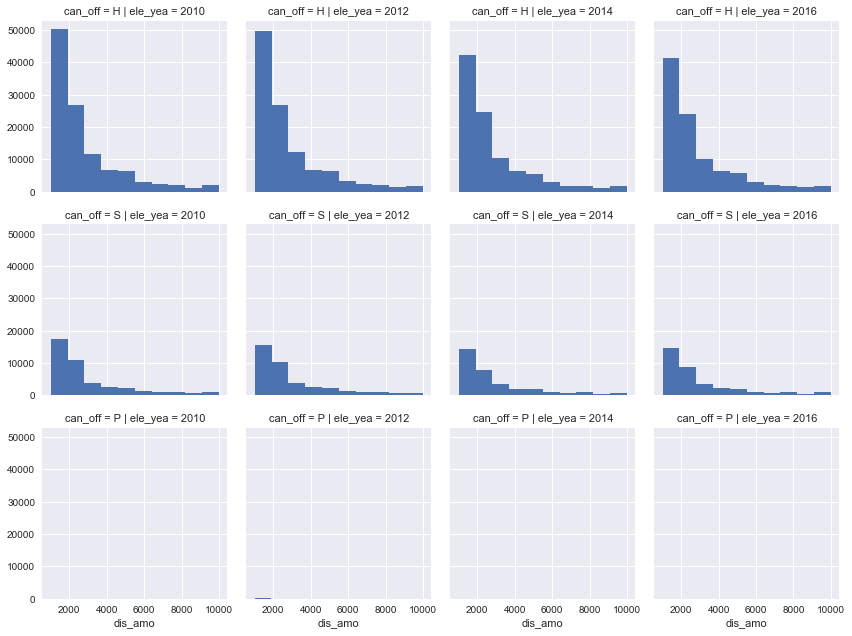

In [16]:
#FacetGrid Plot
g = sns.FacetGrid(dfyear_out, col="ele_yea", row="can_off")
g.map(plt.hist, "dis_amo")